In [2]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from collections import Counter
np.random.seed(0)

# 데이터 로드  
Column: 2126  
Row: 22

In [3]:
# from google.colab import files
# files.upload()

In [4]:
data = pd.read_csv("./data/fetal_health.csv")
print(data.shape)
data.head()

(2126, 22)


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


# 데이터 확인  
- 결측치 없음
- 모든 데이터가 수치형

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [6]:
data.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


# Target data 비율 확인

In [7]:
# 차트로 데이터 비율을 보여주는 함수
def showChart(data):
    print('Class counter: ' + str(Counter(data['fetal_health'])))
    plt.subplots_adjust(left=1,right=3,bottom=1,top=2,wspace=0.2,hspace=0.4)
    plt.subplot(1,2,1)
    plt.title('fetal_health')
    plt.pie(data.groupby(data['fetal_health']).size(), labels=['Normal(0)', 'Suspect(1)', 'Pathological(2)'], autopct='%1.0f%%')
    
    plt.subplot(1,2,2)
    sns.countplot(data=data, x='fetal_health', hue='fetal_health')
    
    plt.show()

Class counter: Counter({1.0: 1655, 2.0: 295, 3.0: 176})


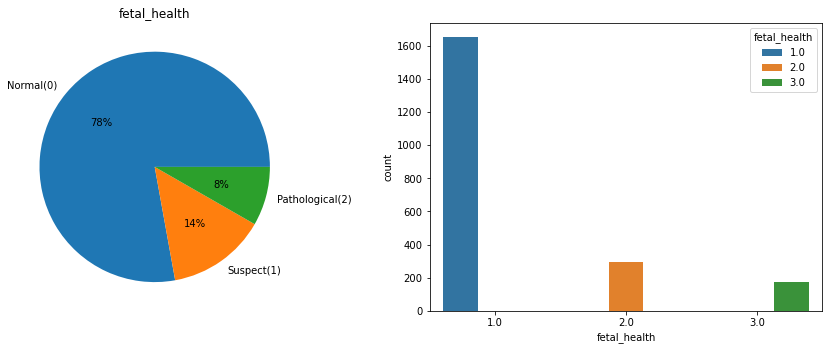

In [8]:
showChart(data)

In [9]:
# 2개 Column씩 그래프 그려줌
# sns.pairplot(data, hue='fetal_health')

# 상관관계 분석  

<AxesSubplot:>

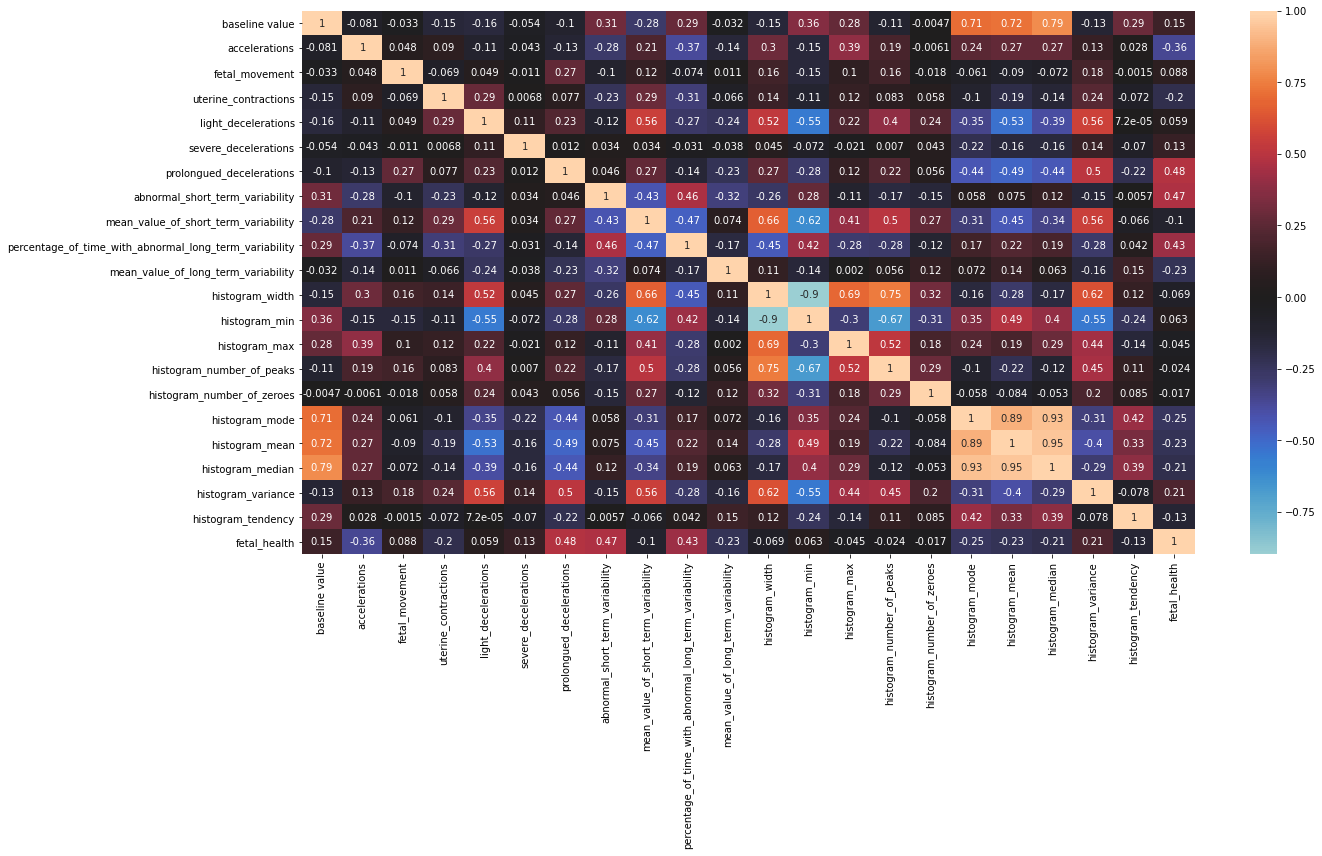

In [25]:
corrmat= data.corr()
plt.figure(figsize=(20,10))  

sns.heatmap(corrmat,annot=True, center=0)

- fetal_health feature와 상관관계가 높은 순서로 정렬

In [11]:
corr_feature = corrmat['fetal_health'].sort_values(ascending=False).head(20).to_frame()
style = corr_feature.style.background_gradient()
style

,fetal_health
fetal_health,1.000000
prolongued_decelerations,0.484859
abnormal_short_term_variability,0.471191
percentage_of_time_with_abnormal_long_term_variability,0.426146
histogram_variance,0.206630
baseline value,0.148151
severe_decelerations,0.131934
fetal_movement,0.088010
histogram_min,0.063175
light_decelerations,0.058870


# Train, Test 데이터 생성

In [12]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2, random_state=42)
print('train', train.shape)
print('test', test.shape)

train (1700, 22)
test (426, 22)


## 생성결과 확인
- 원본 데이터와 비슷한 비율로 잘 나눠짐

Class counter: Counter({1.0: 1322, 2.0: 231, 3.0: 147})


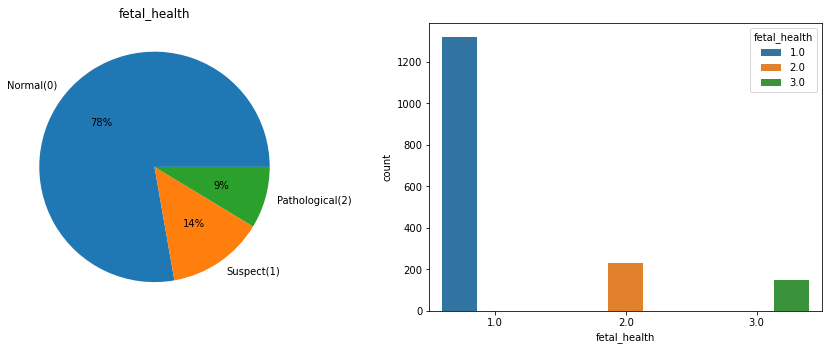

In [13]:
showChart(train)

Class counter: Counter({1.0: 333, 2.0: 64, 3.0: 29})


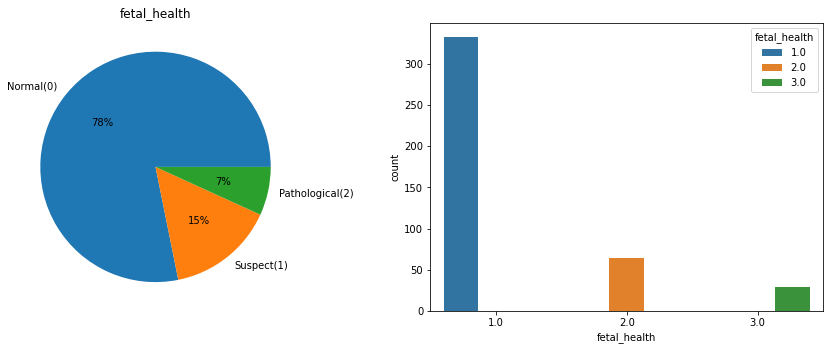

In [14]:
showChart(test)

### Feature/Label 분리

In [15]:
train_y = train['fetal_health'].copy()
train_x = train.drop('fetal_health', axis=1)

test_y = test['fetal_health'].copy()
test_x = test.drop('fetal_health', axis=1)

print('train_x', train_x.shape)
print('train_y', train_y.shape)
print('test_x', test_x.shape)
print('test_y', test_y.shape)

train_x (1700, 21)
train_y (1700,)
test_x (426, 21)
test_y (426,)


# 정규화

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_x = pd.DataFrame(scaler.fit_transform(train_x), columns=train_x.columns)
test_x =  pd.DataFrame(scaler.transform(test_x), columns=test_x.columns)

train_x.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,-0.818907,-0.824976,-0.204261,1.218555,-0.637350,-0.064301,-0.268148,-0.859657,-0.262589,-0.367038,...,-0.500418,0.090151,-0.947494,-0.014607,-0.445313,-0.680274,-0.603307,-0.742903,-0.580514,-0.516697
1,0.692429,-0.824976,-0.204261,-1.159016,-0.637350,-0.064301,-0.268148,0.762723,-0.604484,1.233861,...,1.267146,-0.482204,1.975298,1.686204,-0.445313,0.222228,0.414302,0.281431,-0.545964,-0.516697
2,-1.121174,-0.824976,-0.204261,-1.498669,-0.296949,-0.064301,-0.268148,-1.554963,0.535166,-0.532648,...,-0.807820,0.325826,-1.228531,-1.035093,-0.445313,-1.041275,-0.984911,-1.152636,-0.545964,-0.516697
3,0.390162,0.464049,-0.204261,0.199596,0.043451,-0.064301,-0.268148,-0.627888,-0.490519,-0.532648,...,-0.193016,0.729841,0.794940,-0.014607,-0.445313,0.643396,0.859505,0.759453,-0.338667,-0.516697
4,0.893941,-0.051561,-0.204261,-0.140057,-0.637350,-0.064301,-0.268148,-0.048467,-0.718449,0.957844,...,-1.140840,1.335863,-0.273003,-1.035093,-0.445313,0.763729,0.859505,0.827742,-0.615063,-0.516697


# 불균형 데이터 처리

## SMOTE

Before sampling: Counter({1.0: 1322, 2.0: 231, 3.0: 147})
After sampling: Counter({1.0: 1322, 2.0: 390, 3.0: 250})
Class counter: Counter({1.0: 1322, 2.0: 390, 3.0: 250})


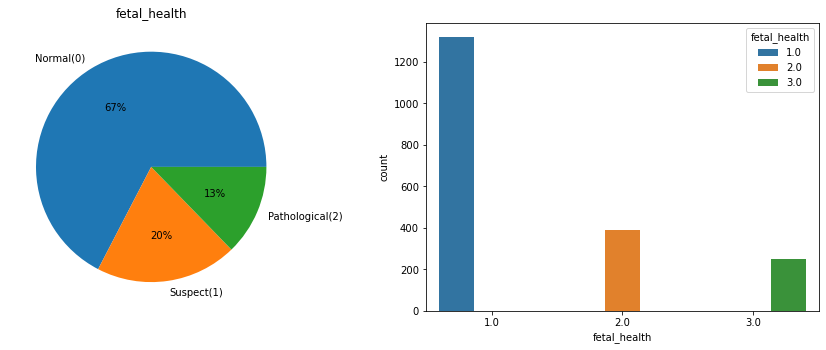

In [17]:
from imblearn.over_sampling import SMOTE

strategy = {1.0:1322, 2.0:390, 3.0:250}
smote = SMOTE(sampling_strategy=strategy, random_state=42)
print('Before sampling: ' + str(Counter(train_y)))ㄴ
train_sampled_x, train_sampled_y = smote.fit_resample(train_x, train_y)
train_smote_x = pd.DataFrame(train_sampled_x, columns=train_x.columns)
train_smote_y = pd.Series(train_sampled_y, name=train_y.name)
print('After sampling: ' + str(Counter(train_smote_y)))

data_smote = train_smote_x.copy()
data_smote['fetal_health'] = train_smote_y
showChart(data_smote)

## ENN

Before sampling: Counter({1.0: 1322, 2.0: 231, 3.0: 147})
After sampling: Counter({1.0: 767, 2.0: 231, 3.0: 147})
Class counter: Counter({1.0: 767, 2.0: 231, 3.0: 147})


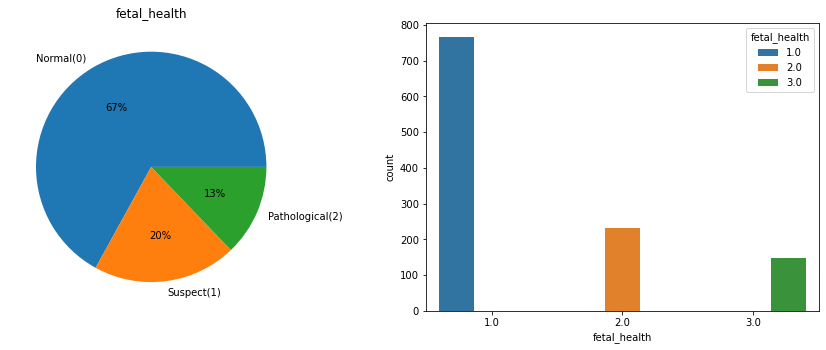

In [18]:
from imblearn.under_sampling import EditedNearestNeighbours 
strategy = [1.0]
enn = EditedNearestNeighbours(sampling_strategy=strategy, n_neighbors=40, n_jobs=-1)
print('Before sampling: ' + str(Counter(train_y)))
train_sampled_x, train_sampled_y = enn.fit_resample(train_x, train_y)
train_enn_x = pd.DataFrame(train_sampled_x, columns=train_x.columns)
train_enn_y = pd.Series(train_sampled_y, name=train_y.name)
print('After sampling: ' + str(Counter(train_enn_y)))

data_enn = train_enn_x.copy()
data_enn['fetal_health'] = train_enn_y
showChart(data_enn)

## SMOTE and ENN

Before sampling: Counter({1.0: 1322, 2.0: 231, 3.0: 147})
After sampling: Counter({1.0: 1165, 2.0: 375, 3.0: 254})
Class counter: Counter({1.0: 1165, 2.0: 375, 3.0: 254})


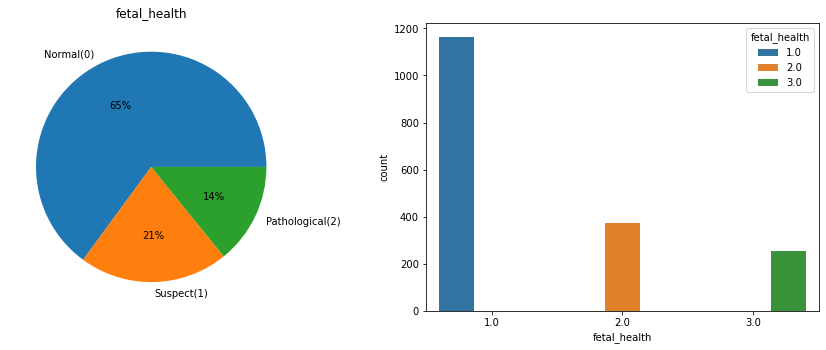

In [19]:
from imblearn.combine import SMOTEENN

strategy = {1.0:1322, 2.0:500, 3.0:300}
smote_enn = SMOTEENN(sampling_strategy=strategy, random_state=42)
print('Before sampling: ' + str(Counter(train_y)))
train_sampled_x, train_sampled_y = smote_enn.fit_resample(train_x, train_y)
train_smote_enn_x = pd.DataFrame(train_sampled_x, columns=train_x.columns)
train_smote_enn_y = pd.Series(train_sampled_y, name=train_y.name)
print('After sampling: ' + str(Counter(train_smote_enn_y)))

data_comb = train_smote_enn_x.copy()
data_comb['fetal_health'] = train_smote_enn_y
showChart(data_comb)

In [20]:
train_name_list = ['Origin', 'SMOTE', 'ENN', 'SMOTE and ENN']
train_x_list = [train_x, train_smote_x, train_enn_x, train_smote_enn_x]
train_y_list = [train_y, train_smote_y, train_enn_y, train_smote_enn_y]

In [21]:
print(train_x.shape)
print(train_smote_x.shape)
print(train_enn_x.shape)
print(train_smote_enn_x.shape)
print(test_x.shape)

(1700, 21)
(1962, 21)
(1145, 21)
(1794, 21)
(426, 21)


# 모델링

## 평가지표

In [22]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.preprocessing import LabelBinarizer

def showMetrics(model, test_x, test_y, pred):
    lb = LabelBinarizer()
    lb_test_y = lb.fit_transform(test_y)
    lb_pred_y =lb.transform(pred)
    score = roc_auc_score(lb_test_y, lb_pred_y, average='macro')
    print('roc_auc_score:', score)

    print(classification_report(test_y, pred))
        
    plot_confusion_matrix(model, test_x, test_y, values_format='d', display_labels=['Normal(0)', 'Suspect(1)', 'Pathological(2)'])
    plt.show()

    if hasattr(model, 'feature_importances_'):
        feature_imp = pd.Series(model.feature_importances_,index=test_x.columns).sort_values(ascending=False)
        sns.barplot(x=feature_imp, y=feature_imp.index)
        plt.xlabel('Feature Importance Score')
        plt.ylabel('Features')
        plt.title('Important Features')
        plt.show()
    return score

In [23]:
model_list = [LogisticRegression(random_state=42, max_iter=np.Infinity), SVC(random_state=42), DecisionTreeClassifier(random_state=42), RandomForestClassifier(random_state=42)]
model_name_list = ['Logistic Regression', "SVC", 'Decision Tree', 'RandomForest']

Origin / Logistic Regression
roc_auc_score: 0.8386127306842583
              precision    recall  f1-score   support

         1.0       0.94      0.93      0.94       333
         2.0       0.63      0.64      0.64        64
         3.0       0.73      0.76      0.75        29

    accuracy                           0.88       426
   macro avg       0.77      0.78      0.77       426
weighted avg       0.88      0.88      0.88       426



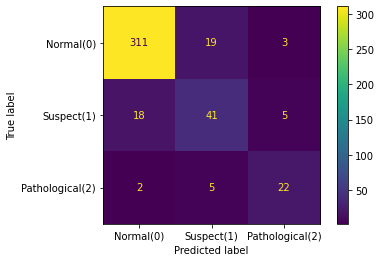

Origin / SVC
roc_auc_score: 0.8607891940297435
              precision    recall  f1-score   support

         1.0       0.94      0.95      0.95       333
         2.0       0.70      0.72      0.71        64
         3.0       0.92      0.76      0.83        29

    accuracy                           0.90       426
   macro avg       0.85      0.81      0.83       426
weighted avg       0.90      0.90      0.90       426



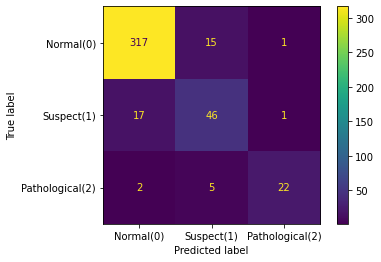

Origin / Decision Tree
roc_auc_score: 0.9215293547905881
              precision    recall  f1-score   support

         1.0       0.96      0.94      0.95       333
         2.0       0.75      0.81      0.78        64
         3.0       0.93      0.97      0.95        29

    accuracy                           0.92       426
   macro avg       0.88      0.91      0.89       426
weighted avg       0.93      0.92      0.93       426



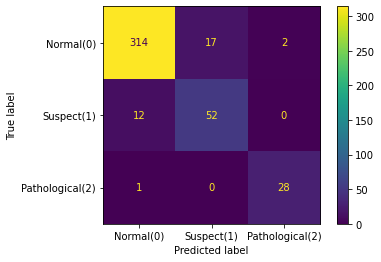

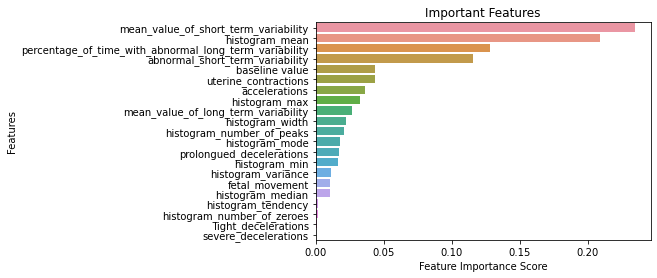

Origin / RandomForest
roc_auc_score: 0.9169173678485855
              precision    recall  f1-score   support

         1.0       0.96      0.98      0.97       333
         2.0       0.91      0.77      0.83        64
         3.0       0.93      0.93      0.93        29

    accuracy                           0.95       426
   macro avg       0.93      0.89      0.91       426
weighted avg       0.95      0.95      0.95       426



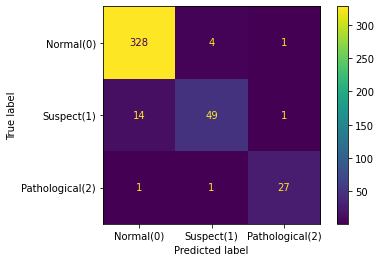

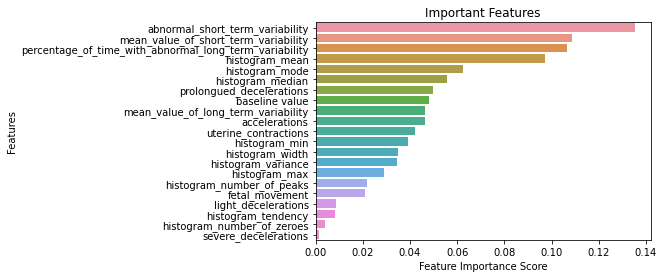

SMOTE / Logistic Regression
roc_auc_score: 0.8768559701429277
              precision    recall  f1-score   support

         1.0       0.96      0.93      0.94       333
         2.0       0.66      0.73      0.70        64
         3.0       0.73      0.83      0.77        29

    accuracy                           0.89       426
   macro avg       0.78      0.83      0.80       426
weighted avg       0.90      0.89      0.89       426



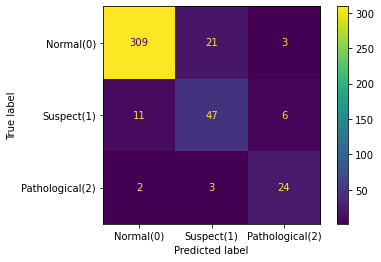

SMOTE / SVC
roc_auc_score: 0.8697444712850335
              precision    recall  f1-score   support

         1.0       0.95      0.93      0.94       333
         2.0       0.65      0.73      0.69        64
         3.0       0.82      0.79      0.81        29

    accuracy                           0.89       426
   macro avg       0.81      0.82      0.81       426
weighted avg       0.90      0.89      0.90       426



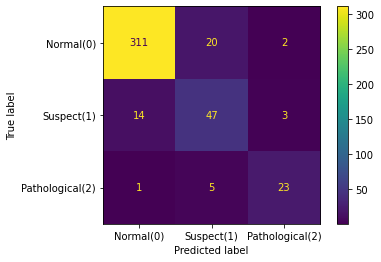

SMOTE / Decision Tree
roc_auc_score: 0.926782719874225
              precision    recall  f1-score   support

         1.0       0.96      0.97      0.97       333
         2.0       0.89      0.80      0.84        64
         3.0       0.90      0.97      0.93        29

    accuracy                           0.95       426
   macro avg       0.92      0.91      0.91       426
weighted avg       0.95      0.95      0.95       426



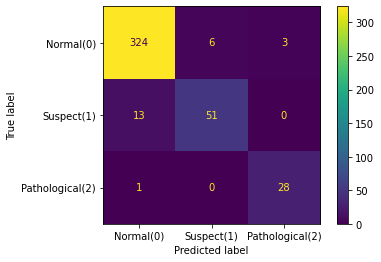

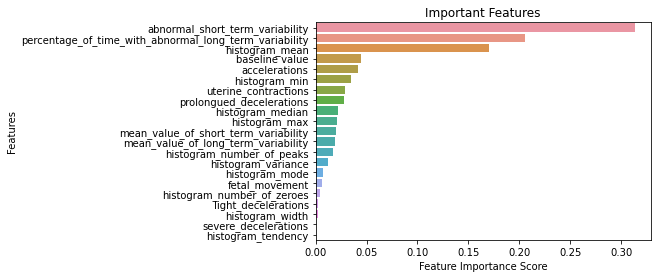

SMOTE / RandomForest
roc_auc_score: 0.9369769633445447
              precision    recall  f1-score   support

         1.0       0.97      0.98      0.97       333
         2.0       0.89      0.84      0.86        64
         3.0       0.93      0.93      0.93        29

    accuracy                           0.96       426
   macro avg       0.93      0.92      0.92       426
weighted avg       0.95      0.96      0.96       426



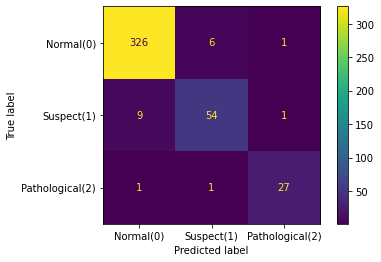

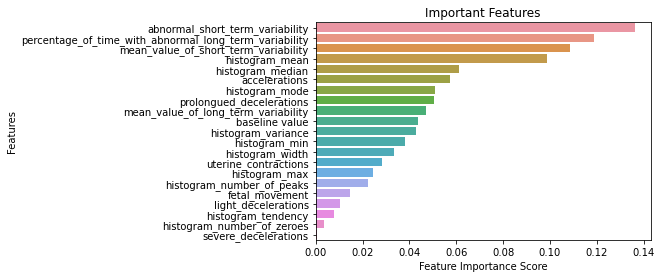

ENN / Logistic Regression
roc_auc_score: 0.8513550824491464
              precision    recall  f1-score   support

         1.0       0.98      0.77      0.86       333
         2.0       0.46      0.88      0.61        64
         3.0       0.49      0.76      0.59        29

    accuracy                           0.78       426
   macro avg       0.64      0.80      0.69       426
weighted avg       0.87      0.78      0.80       426



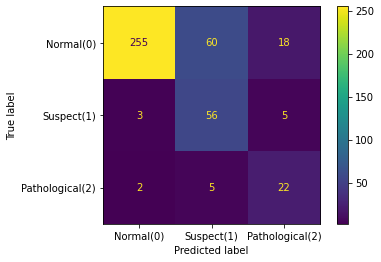

ENN / SVC
roc_auc_score: 0.870348706209714
              precision    recall  f1-score   support

         1.0       1.00      0.75      0.86       333
         2.0       0.43      0.94      0.59        64
         3.0       0.62      0.79      0.70        29

    accuracy                           0.78       426
   macro avg       0.68      0.83      0.71       426
weighted avg       0.89      0.78      0.80       426



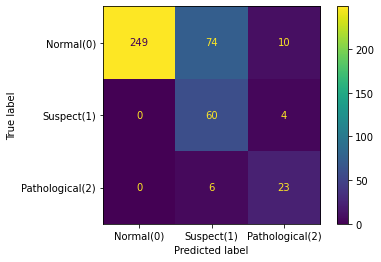

ENN / Decision Tree
roc_auc_score: 0.9105304042993664
              precision    recall  f1-score   support

         1.0       0.98      0.78      0.87       333
         2.0       0.48      0.92      0.63        64
         3.0       0.76      1.00      0.87        29

    accuracy                           0.82       426
   macro avg       0.74      0.90      0.79       426
weighted avg       0.89      0.82      0.84       426



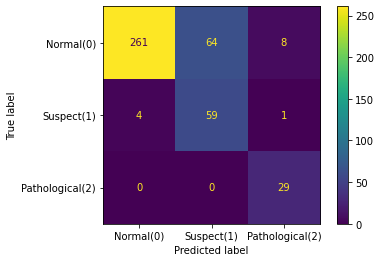

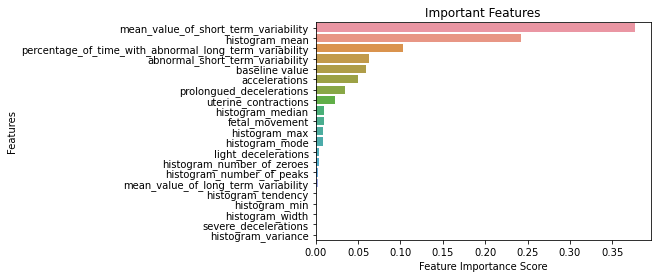

ENN / RandomForest
roc_auc_score: 0.9168930341944547
              precision    recall  f1-score   support

         1.0       0.99      0.82      0.90       333
         2.0       0.52      0.89      0.66        64
         3.0       0.76      1.00      0.87        29

    accuracy                           0.85       426
   macro avg       0.76      0.90      0.81       426
weighted avg       0.90      0.85      0.86       426



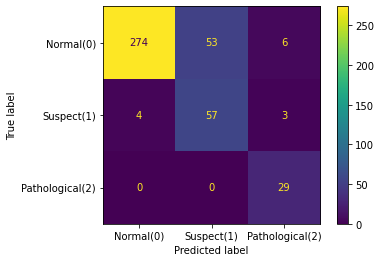

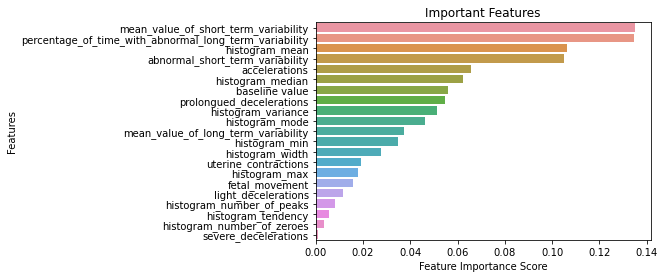

SMOTE and ENN / Logistic Regression
roc_auc_score: 0.8848655347182502
              precision    recall  f1-score   support

         1.0       0.97      0.88      0.92       333
         2.0       0.60      0.83      0.70        64
         3.0       0.71      0.83      0.76        29

    accuracy                           0.87       426
   macro avg       0.76      0.85      0.79       426
weighted avg       0.89      0.87      0.88       426



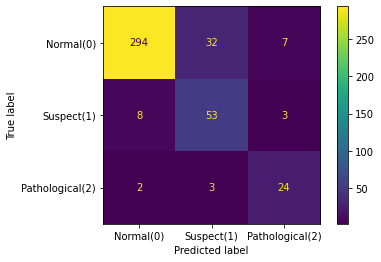

SMOTE and ENN / SVC
roc_auc_score: 0.8770520504404953
              precision    recall  f1-score   support

         1.0       0.97      0.90      0.93       333
         2.0       0.59      0.83      0.69        64
         3.0       0.81      0.76      0.79        29

    accuracy                           0.88       426
   macro avg       0.79      0.83      0.80       426
weighted avg       0.90      0.88      0.89       426



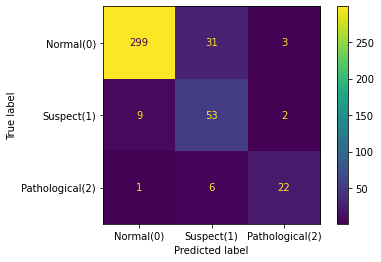

SMOTE and ENN / Decision Tree
roc_auc_score: 0.9020661547375863
              precision    recall  f1-score   support

         1.0       0.95      0.92      0.94       333
         2.0       0.67      0.77      0.72        64
         3.0       0.88      0.97      0.92        29

    accuracy                           0.90       426
   macro avg       0.83      0.88      0.86       426
weighted avg       0.91      0.90      0.90       426



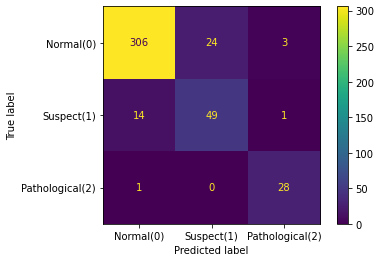

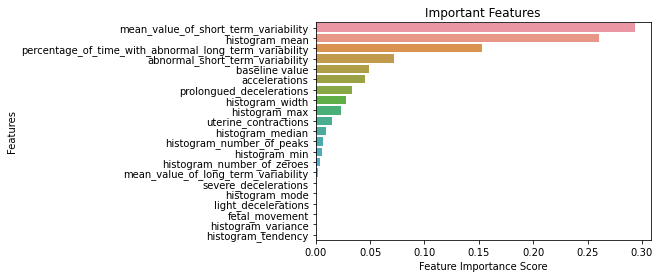

SMOTE and ENN / RandomForest
roc_auc_score: 0.9172566673263848
              precision    recall  f1-score   support

         1.0       0.97      0.95      0.96       333
         2.0       0.76      0.83      0.79        64
         3.0       0.84      0.90      0.87        29

    accuracy                           0.92       426
   macro avg       0.86      0.89      0.87       426
weighted avg       0.93      0.92      0.93       426



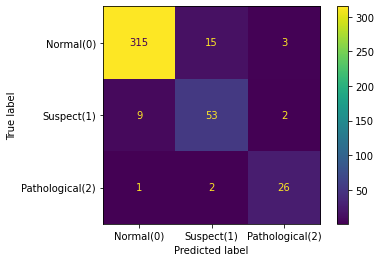

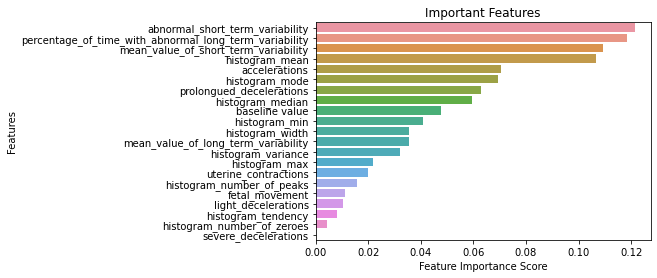

roc_auc_score rank


,0
SMOTE / RandomForest,0.936977
SMOTE / Decision Tree,0.926783
Origin / Decision Tree,0.921529
SMOTE and ENN / RandomForest,0.917257
Origin / RandomForest,0.916917
ENN / RandomForest,0.916893
ENN / Decision Tree,0.910530
SMOTE and ENN / Decision Tree,0.902066
SMOTE and ENN / Logistic Regression,0.884866
SMOTE and ENN / SVC,0.877052


In [24]:
result_dict = dict()

for i in range(len(train_name_list)):
    x = train_x_list[i]
    y = train_y_list[i]

    for k in range(len(model_name_list)):
        data_model_str = '{} / {}'.format(train_name_list[i], model_name_list[k])
        print(data_model_str)
        model = model_list[k]
        model.fit(x, y)
        pred_y = model.predict(test_x)
        score = showMetrics(model, test_x, test_y, pred_y)
        result_dict[data_model_str] = score

print('roc_auc_score rank')
result_series = pd.Series(result_dict)
sorted_result = result_series.sort_values(ascending=False).head(20).to_frame()
style = sorted_result.style.background_gradient()
style